In [1]:
# Value Function Iteration with IID Income
# Greg Kaplan 2017
# Translated by Tom Sweeney Dec 2020

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve 
from discrete_normal import discrete_normal

# PARAMETERS

## preferences
risk_aver = 2
beta = 0.9688

## returns
r = 0.03
R = 1+r

## income risk: discretized N(mu,sigma^2)
mu_y = 1
sd_y = 0.2
ny = 5

## asset grids
na = 2000
amax = 900
borrow_lim = 0
agrid_par = 1 # 1 for linear, 0 for L-shaped

## computation
max_iter = 1000
tol_iter = 1.0e-4
Nsim = 50000
Tsim = 2500

# OPTIONS
Display = 1
DoSimulate = 1
MakePlots = 1

# DRAW RANDOM NUMBERS

np.random.seed(2020)
yrand = np.random.rand(Nsim,Tsim)

# SET UP GRIDS

## assets
agrid = np.linspace(0,1,na).reshape(na,1)
agrid = agrid**(1/agrid_par)
agrid = borrow_lim + (amax-borrow_lim)*agrid

## income: disretize normal distribution
width = fsolve(lambda x: discrete_normal(ny,mu_y,sd_y,x)[0],2)
temp, ygrid, ydist = discrete_normal(ny,mu_y,sd_y,width)
ycumdist = np.cumsum(ydist)

# UTILITY FUNCTION

if risk_aver==1:
    u = lambda c: np.log(c)
else:
    u = lambda c: (c**(1-risk_aver)-1)/(1-risk_aver) 

# INITIALIZE VALUE FUNCTION

Vguess = np.zeros((na,ny))
for iy in range(0,ny):
    Vguess[:,iy] = u(r*agrid[0]+ygrid[iy])/(1-beta)

### Vguess = np.ones((na,ny))

# ITERATE ON VALUE FUNCTION

V = Vguess.copy()

Vdiff = 1
Iter = 0


In [2]:

while Iter <= max_iter and Vdiff > tol_iter:
    Iter = Iter + 1
    Vlast = V.copy()
    V = np.zeros((na,ny))
    sav = np.zeros((na,ny))
    savind = np.zeros((na,ny), dtype=int)
    con = np.zeros((na,ny))
    
    ## loop over assets
    for ia in range(0,na):
        
        ## loop over income
        for iy in range(0,ny):
            cash = R*agrid[ia] + ygrid[iy]
            Vchoice = u(np.maximum(cash-agrid,1.0e-10)) + beta*(Vlast @ ydist)           
            V[ia,iy] = np.max(Vchoice)
            savind[ia,iy] = np.argmax(Vchoice)
            sav[ia,iy] = agrid[savind[ia,iy]]
            con[ia,iy] = cash - sav[ia,iy]
    
    Vdiff = np.max(abs(V-Vlast))
    if Display >= 1:
        print('Iteration no. ' + str(Iter), ' max val fn diff is ' + str(Vdiff))
 

Iteration no. 1  max val fn diff is 19.82809432276025
Iteration no. 2  max val fn diff is 1.008877771624777
Iteration no. 3  max val fn diff is 0.9754722226854502
Iteration no. 4  max val fn diff is 0.9432269431556701
Iteration no. 5  max val fn diff is 0.9120982935068991
Iteration no. 6  max val fn diff is 0.8820444823577325
Iteration no. 7  max val fn diff is 0.8530254855216413
Iteration no. 8  max val fn diff is 0.8250029230092668
Iteration no. 9  max val fn diff is 0.797940012202667
Iteration no. 10  max val fn diff is 0.7718014938025624
Iteration no. 11  max val fn diff is 0.7465535704090502
Iteration no. 12  max val fn diff is 0.7221638183944421
Iteration no. 13  max val fn diff is 0.6986009619178581
Iteration no. 14  max val fn diff is 0.6758353037860871
Iteration no. 15  max val fn diff is 0.6538380779986319
Iteration no. 16  max val fn diff is 0.6325815246310551
Iteration no. 17  max val fn diff is 0.6120396527424461
Iteration no. 18  max val fn diff is 0.5921865271450297
Iter

In [3]:
con

array([[ 0.61325388,  0.80662694,  1.        ,  0.74314795,  0.936521  ],
       [ 1.07698575,  0.82013369,  1.01350675,  1.20687981,  0.95002776],
       [ 1.0904925 ,  0.83364045,  1.02701351,  1.22038657,  0.96353451],
       ...,
       [28.93691571, 29.13028877, 28.87343672, 29.06680978, 28.80995772],
       [28.95042247, 29.14379553, 28.88694347, 29.08031653, 28.82346448],
       [28.96392922, 29.15730228, 28.90045023, 29.09382328, 28.83697123]])

 Simulating, time period 100
 Simulating, time period 200
 Simulating, time period 300
 Simulating, time period 400
 Simulating, time period 500
 Simulating, time period 600
 Simulating, time period 700
 Simulating, time period 800
 Simulating, time period 900
 Simulating, time period 1000
 Simulating, time period 1100
 Simulating, time period 1200
 Simulating, time period 1300
 Simulating, time period 1400
 Simulating, time period 1500
 Simulating, time period 1600
 Simulating, time period 1700
 Simulating, time period 1800
 Simulating, time period 1900
 Simulating, time period 2000
 Simulating, time period 2100
 Simulating, time period 2200
 Simulating, time period 2300
 Simulating, time period 2400
 Simulating, time period 2500


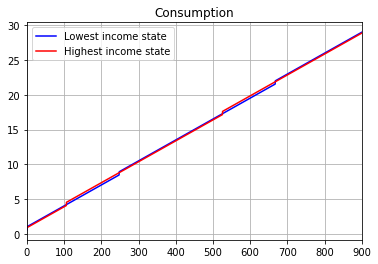

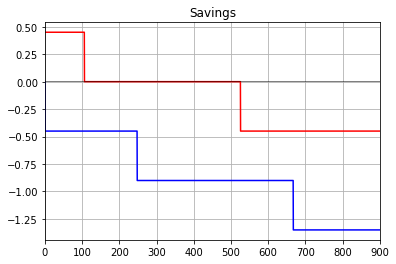

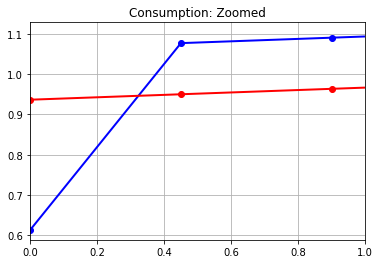

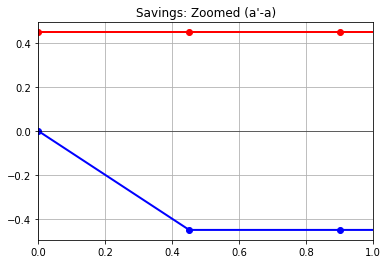

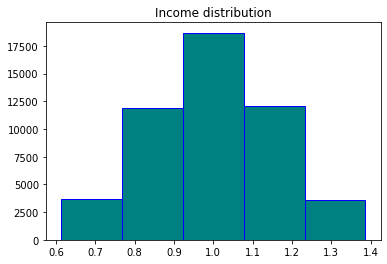

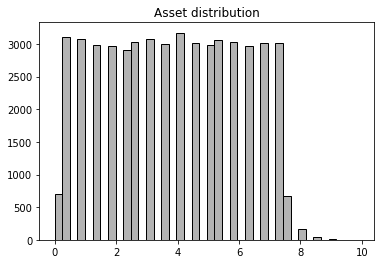

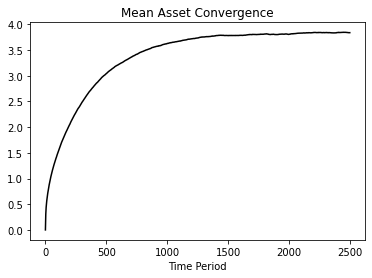

Mean assets: 3.8398738192762463
Fraction borrowing constrained: 1.396%
10th Percentile: 0.9005860613957777
50th Percentile: 4.052637276281
90th Percentile: 6.754395460468332
99th Percentile: 7.654981521864109


In [4]:
      
# SIMULATE
if DoSimulate == 1:
    yindsim = np.zeros((Nsim,Tsim), dtype=int)
    aindsim = np.zeros((Nsim,Tsim), dtype=int)
    
    ## initial assets
    aindsim[:,0] = 0
    
    ## loop over time periods
    for it in range(0,Tsim):
        if Display >= 1 and (it+1)%100 == 0:
            print(' Simulating, time period ' + str(it+1))
        
        ### income realization: note we vectorize simulations at once because
        ### of matlab, in other languages we would loop over individuals
        yindsim[yrand[:,it]<=ycumdist[0],it] = 0
        for iy in range(1,ny):
            yindsim[np.logical_and(yrand[:,it]>ycumdist[iy-1], yrand[:,it]<=ycumdist[iy]),it] = iy
        
        ## asset choice
        if it < Tsim-1:
            for iy in range(0,ny):
                aindsim[yindsim[:,it]==iy,it+1] = savind[aindsim[yindsim[:,it]==iy,it],iy]

    ## assign actual asset and income values
    asim = agrid[aindsim]
    ysim = ygrid[yindsim]

# MAKE PLOTS
if MakePlots==1:
    
    ## consumption policy function
    plt.plot(agrid,con[:,0],'b-',label = 'Lowest income state')
    plt.plot(agrid,con[:,ny-1],'r-', label = 'Highest income state')
    plt.grid()
    plt.xlim((0,amax))
    ### plt.title('Consumption Policy Function')
    plt.title('Consumption')
    plt.legend()
    plt.show()

    ## savings policy function
    plt.plot(agrid,sav[:,0]-agrid[:,0],'b-')
    plt.plot(agrid,sav[:,ny-1]-agrid[:,0],'r-')
    plt.plot(agrid,np.zeros((na,1)),'k',linewidth=0.5)
    plt.grid()
    plt.xlim((0,amax))
    ### plt.title('Savings Policy Function (a''-a)')
    plt.title('Savings')
    plt.show()
    
    ## nice zoom
    xlimits = (0,1)
    xlimind = np.ones(na, dtype=bool)
    if np.min(agrid) < xlimits[0]:
        xlimind = np.logical_and(xlimind,(agrid[:,0]>=np.max(agrid[agrid<xlimits[0]])))
    elif np.min(agrid) > xlimits[1]:
        xlimind = 0
    if np.max(agrid) > xlimits[1]:
        xlimind = np.logical_and(xlimind,(agrid[:,0]<=np.min(agrid[agrid>xlimits[1]])))
    elif np.max(agrid) < xlimits[0]:
        xlimind = 0

    ## consumption policy function: zoomed in
    plt.plot(agrid[xlimind],con[xlimind,0],'b-o',linewidth=2)
    plt.plot(agrid[xlimind],con[xlimind,ny-1],'r-o',linewidth=2)
    plt.grid()
    plt.xlim(xlimits)
    plt.title('Consumption: Zoomed')
    plt.show()

    ## savings policy function: zoomed in
    plt.plot(agrid[xlimind],sav[xlimind,0]-agrid[xlimind,0],'b-o',linewidth=2)
    plt.plot(agrid[xlimind],sav[xlimind,ny-1]-agrid[xlimind,0],'r-o',linewidth=2)
    plt.plot(agrid,np.zeros((na,1)),'k',linewidth =0.5)
    plt.grid()
    plt.xlim(xlimits)
    plt.title('Savings: Zoomed (a\'-a)')
    plt.show()

    ## income distribution
    plt.hist(ysim[:,Tsim-1],len(ygrid),facecolor=(0,0.5,0.5),edgecolor='blue')
    plt.ylabel('')
    plt.title('Income distribution')
    plt.show()

    ## asset distribution
    plt.hist(asim[:,Tsim-1],40,facecolor=(.7,.7,.7),edgecolor='black')
    plt.ylabel('')
    plt.title('Asset distribution')
    plt.show()

    ## convergence check
    plt.plot(range(0,Tsim),np.mean(asim,0),'k-',linewidth=1.5)
    plt.xlabel('Time Period')
    plt.title('Mean Asset Convergence')
    plt.show()

    ## asset distribution statistics
    aysim = asim[:,Tsim-1]/np.mean(ysim[:,Tsim-1])
    print('Mean assets: ' + str(np.mean(aysim)))
    print('Fraction borrowing constrained: ' + str(np.sum(aysim==borrow_lim)/Nsim * 100) + '%')
    print('10th Percentile: ' + str(np.quantile(aysim,.1)))
    print('50th Percentile: ' + str(np.quantile(aysim,.5)))
    print('90th Percentile: ' + str(np.quantile(aysim,.9)))
    print('99th Percentile: ' + str(np.quantile(aysim,.99)))